<center><img src="https://ingenieria2.udea.edu.co/gepp/assets/logo-ingenieria-udea.svg"></center>

## Modelos de Variable Latente y Clasificadores Lineales para el Reconocimiento de Patrones

**Tratamiento de Señales III**

*Presentado por:*

*Luis alberto Ochoa M.*

*Jhon James Tapie P.*

*Prof. Hernán Felipe García Arias.*

**Facultad de Ingeniería**

**Universidad de Antioquia**

2023-1

## Introducción a la Clasificación

Un clasificador lo que realiza es a partir de una base de datos o de una observación ${\bf{x}}_n$ realiza una predicción de una etiqueta discreta $t_n$,

Para nosotros en el caso de la base de datos de sismos, tenemos $3$ tipos diferentes de clases

- 1 - Local
- 2 - Regional
- 3 - Telesismo

In [53]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from google.colab import drive
from ipywidgets import interact

from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

## **Almacenamiento de los datos**

Se descarga el datFrame almacenado en el repositorio de GitHub.

In [54]:
!wget "https://raw.githubusercontent.com/LuisOchoaM/MiniProyecto2_TS3/main/dataFrame.csv" -O "df.csv"

--2023-05-07 18:05:27--  https://raw.githubusercontent.com/LuisOchoaM/MiniProyecto2_TS3/main/dataFrame.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61787 (60K) [text/plain]
Saving to: ‘df.csv’

df.csv              100%[===================>]  60.34K  --.-KB/s    in 0.01s   

2023-05-07 18:05:27 (5.23 MB/s) - ‘df.csv’ saved [61787/61787]



## **Cargar el archivo CSV**

Se carga el dataFrame al notebook nediante la libreria pandas.

In [55]:
df = pd.read_csv('df.csv')

Existen $19$ observaciones por cada tipo de sismo.

In [56]:
df

,Entropia,no_zero_crossings,no_mean_crossings,n5,n25,n75,n95,median,mean,std,var,rms,min_STFT,P_max,F_max,Media,Varianza,max_STFT,Energia,labels
0,8.328077,2376.0,2377.0,-0.021606,-0.010953,0.010924,0.022074,0.000000e+00,1.069409e-06,0.014000,1.959913e-04,0.011467,4.736851e-11,0.009005,47.265625,0.000283,4.538342e-07,0.009005,7.371625e-04,1
1,8.328077,1501.0,1501.0,-0.017622,-0.007869,0.007007,0.020165,-4.024594e-05,-1.431431e-06,0.011927,1.422589e-04,0.009054,1.943391e-13,0.003850,47.265625,0.000342,2.715437e-07,0.003850,1.144120e-04,1
2,8.328077,1919.0,1919.0,-0.002915,-0.001278,0.001190,0.003214,0.000000e+00,-1.060453e-07,0.001934,3.740981e-06,0.001482,9.707482e-12,0.000770,47.656250,0.000058,6.931385e-09,0.000770,5.390501e-06,1
3,7.998266,1917.0,1917.0,-0.010792,-0.004107,0.004061,0.010887,0.000000e+00,-2.210769e-07,0.006511,4.239383e-05,0.004908,0.000000e+00,0.003171,32.812500,0.000158,9.443722e-08,0.003171,8.723015e-05,1
4,7.998266,1476.0,1476.0,-0.009991,-0.004116,0.003989,0.010399,0.000000e+00,-1.592889e-06,0.006214,3.861349e-05,0.004732,0.000000e+00,0.003298,32.812500,0.000158,8.410741e-08,0.003298,8.158853e-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,6.434148,5611.0,5611.0,-0.002866,-0.000378,0.000412,0.002853,0.000000e+00,-5.397804e-08,0.001712,2.932204e-06,0.001004,0.000000e+00,0.001973,27.343750,0.000039,6.864278e-09,0.001973,1.043230e-05,3
185,6.434148,7731.0,7731.0,-0.000478,-0.000068,0.000071,0.000481,0.000000e+00,-5.852150e-09,0.000277,7.671583e-08,0.000166,0.000000e+00,0.000138,50.390625,0.000007,1.752169e-10,0.000138,1.424417e-07,3
186,10.208617,3310.0,3310.0,-0.022325,-0.004837,0.004834,0.022364,-3.791597e-05,2.399427e-07,0.015097,2.279068e-04,0.008950,2.733640e-12,0.024715,3.906250,0.000234,5.980105e-07,0.024715,1.029804e-04,3
187,10.208617,9578.0,9578.0,-0.003928,-0.001596,0.001610,0.003901,6.029305e-06,2.880234e-07,0.002412,5.817229e-06,0.001905,4.202581e-12,0.001539,25.781250,0.000074,1.137149e-08,0.001539,1.160673e-05,3


## Se extraen las características (X) y etiquetas (y) del dataframe.

In [57]:
X = df.iloc[:, :-1].values  # Selecciona todas las columnas excepto la última
y = df.iloc[:, -1].values   # Selecciona la última columna
Y=y.copy()

# Convertir la etiqueta en un array de enteros (opcional)
#y = np.array([int(label.split('_')[1]) for label in y])

# Imprimir el número de ejemplos y características
print('Número de ejemplos:', X.shape[0])
print('Número de características:', X.shape[1])

Número de ejemplos: 189
Número de características: 19


## Escalado de datos
La razón por la que se realiza el escalado de los datos, es porque se asume que cada una de las 19 características que se encuentran en el conjunto de datos tiene una escala diferente. Esto puede provocar que algunos modelos de aprendizaje automático se desempeñen peor o que algunos coeficientes de las características tengan un peso desproporcionado en comparación con otras características.

Al escalar los datos, cada característica se centra en cero y se divide por su desviación estándar, lo que resulta en una media igual a cero y una desviación estándar igual a uno. Esto significa que todas las características se encuentran en una escala comparable y evita que alguna característica tenga un efecto dominante en el modelo. 

In [58]:
# Escalado de las caracteristicas
scaler = StandardScaler()
scaler.fit(X)
Xscaled = scaler.transform(X)

# Implementación de PCA

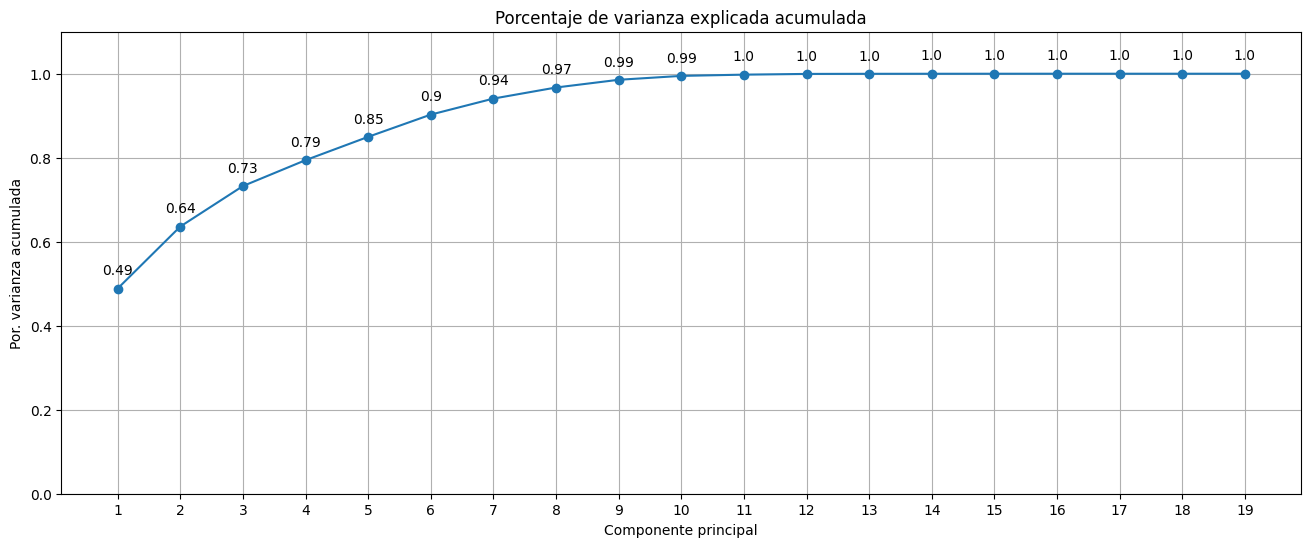

In [59]:
featuresMatrix_DF = pd.DataFrame(X)

# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(featuresMatrix_DF)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))
ax.plot(
    np.arange(len(featuresMatrix_DF.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(featuresMatrix_DF.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');
ax.grid();

Según la gráfica de porcentaje de varianza explicada acumulada, con 6 o 7 componentes en el espacio latente ya se tiene la mayor parte de la información utilizando todos los datos y todas las características, sin embargo el desempeño aumenta un poco al incrementar el número de componentes hasta 11, ya que a partir de este valor el incremento en el desempeño no es mucho.

Basandose en la gráfica de porcentaje de varianza explicada acumulada se decide trabajar con los siguientes valores para PCA:

* 2 Componentes
* 6 Componentes
* 11 Componentes
* 15 Componentes

Como es de esperarse, a mayor número de componentes, mayor será la varianza explicada.

In [60]:
# Creamos el modelo PCA
pca_2Components = PCA(n_components=2)
pca_6Components = PCA(n_components=6)
pca_11Components = PCA(n_components=11)
pca_15Components = PCA(n_components=15)

# Entrenamos el modelo y Transformamos los datos al espacio latente
XPCA2components = pca_2Components.fit_transform(Xscaled)
XPCA6components = pca_6Components.fit_transform(Xscaled)
XPCA11components = pca_11Components.fit_transform(Xscaled)
XPCA15components = pca_15Components.fit_transform(Xscaled)

# print("original shape:   ", pca_2Components.shape)
print("transformed shape:", XPCA2components.shape)

# print("original shape:   ", pca_6Components.shape)
print("transformed shape:", XPCA6components.shape)

# print("original shape:   ", pca_11Components.shape)
print("transformed shape:", XPCA11components.shape)

# print("original shape:   ", pca_15Components.shape)
print("transformed shape:", XPCA15components.shape)

transformed shape: (189, 2)
transformed shape: (189, 6)
transformed shape: (189, 11)
transformed shape: (189, 15)


## Visualización de pares
Ahora podemos trazar las componentes principales de algunos de los espacios latentes para conocer los datos:

#### Visualización de PCA (2 componentes)

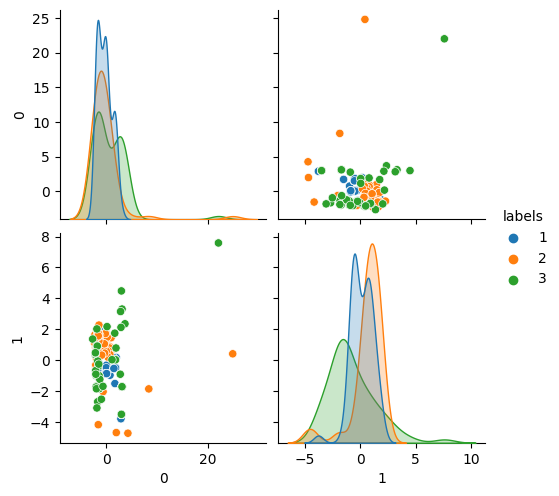

In [61]:
import seaborn as sns
dataFramePCA= pd.DataFrame(XPCA2components)
dataFramePCA['labels'] = Y
sns.pairplot(dataFramePCA, hue='labels', palette= 'tab10')

#### Visualización de PCA (6 componentes)

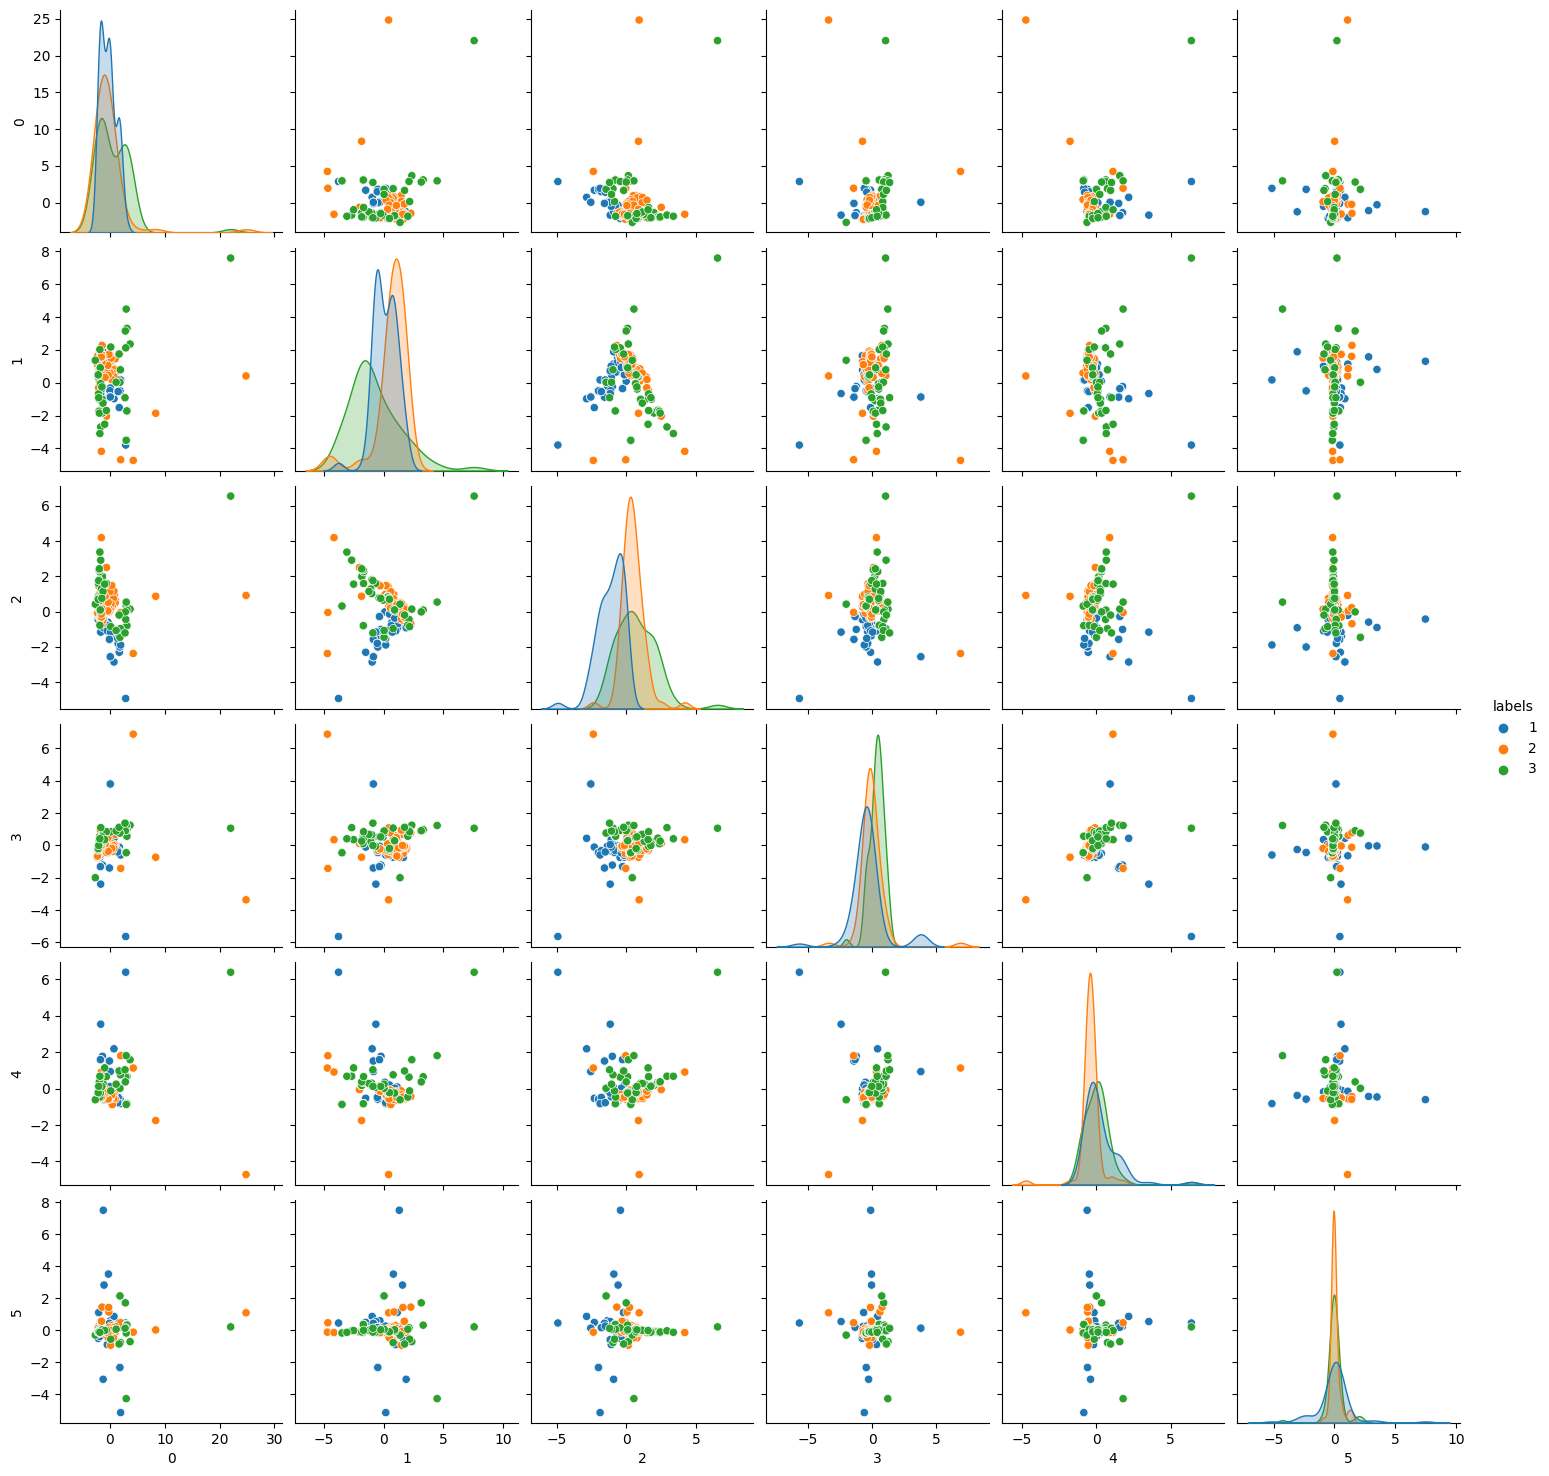

In [62]:
import seaborn as sns
dataFramePCA= pd.DataFrame(XPCA6components)
dataFramePCA['labels'] = Y
sns.pairplot(dataFramePCA, hue='labels', palette= 'tab10')

#### Visualización de PCA (11 componentes)

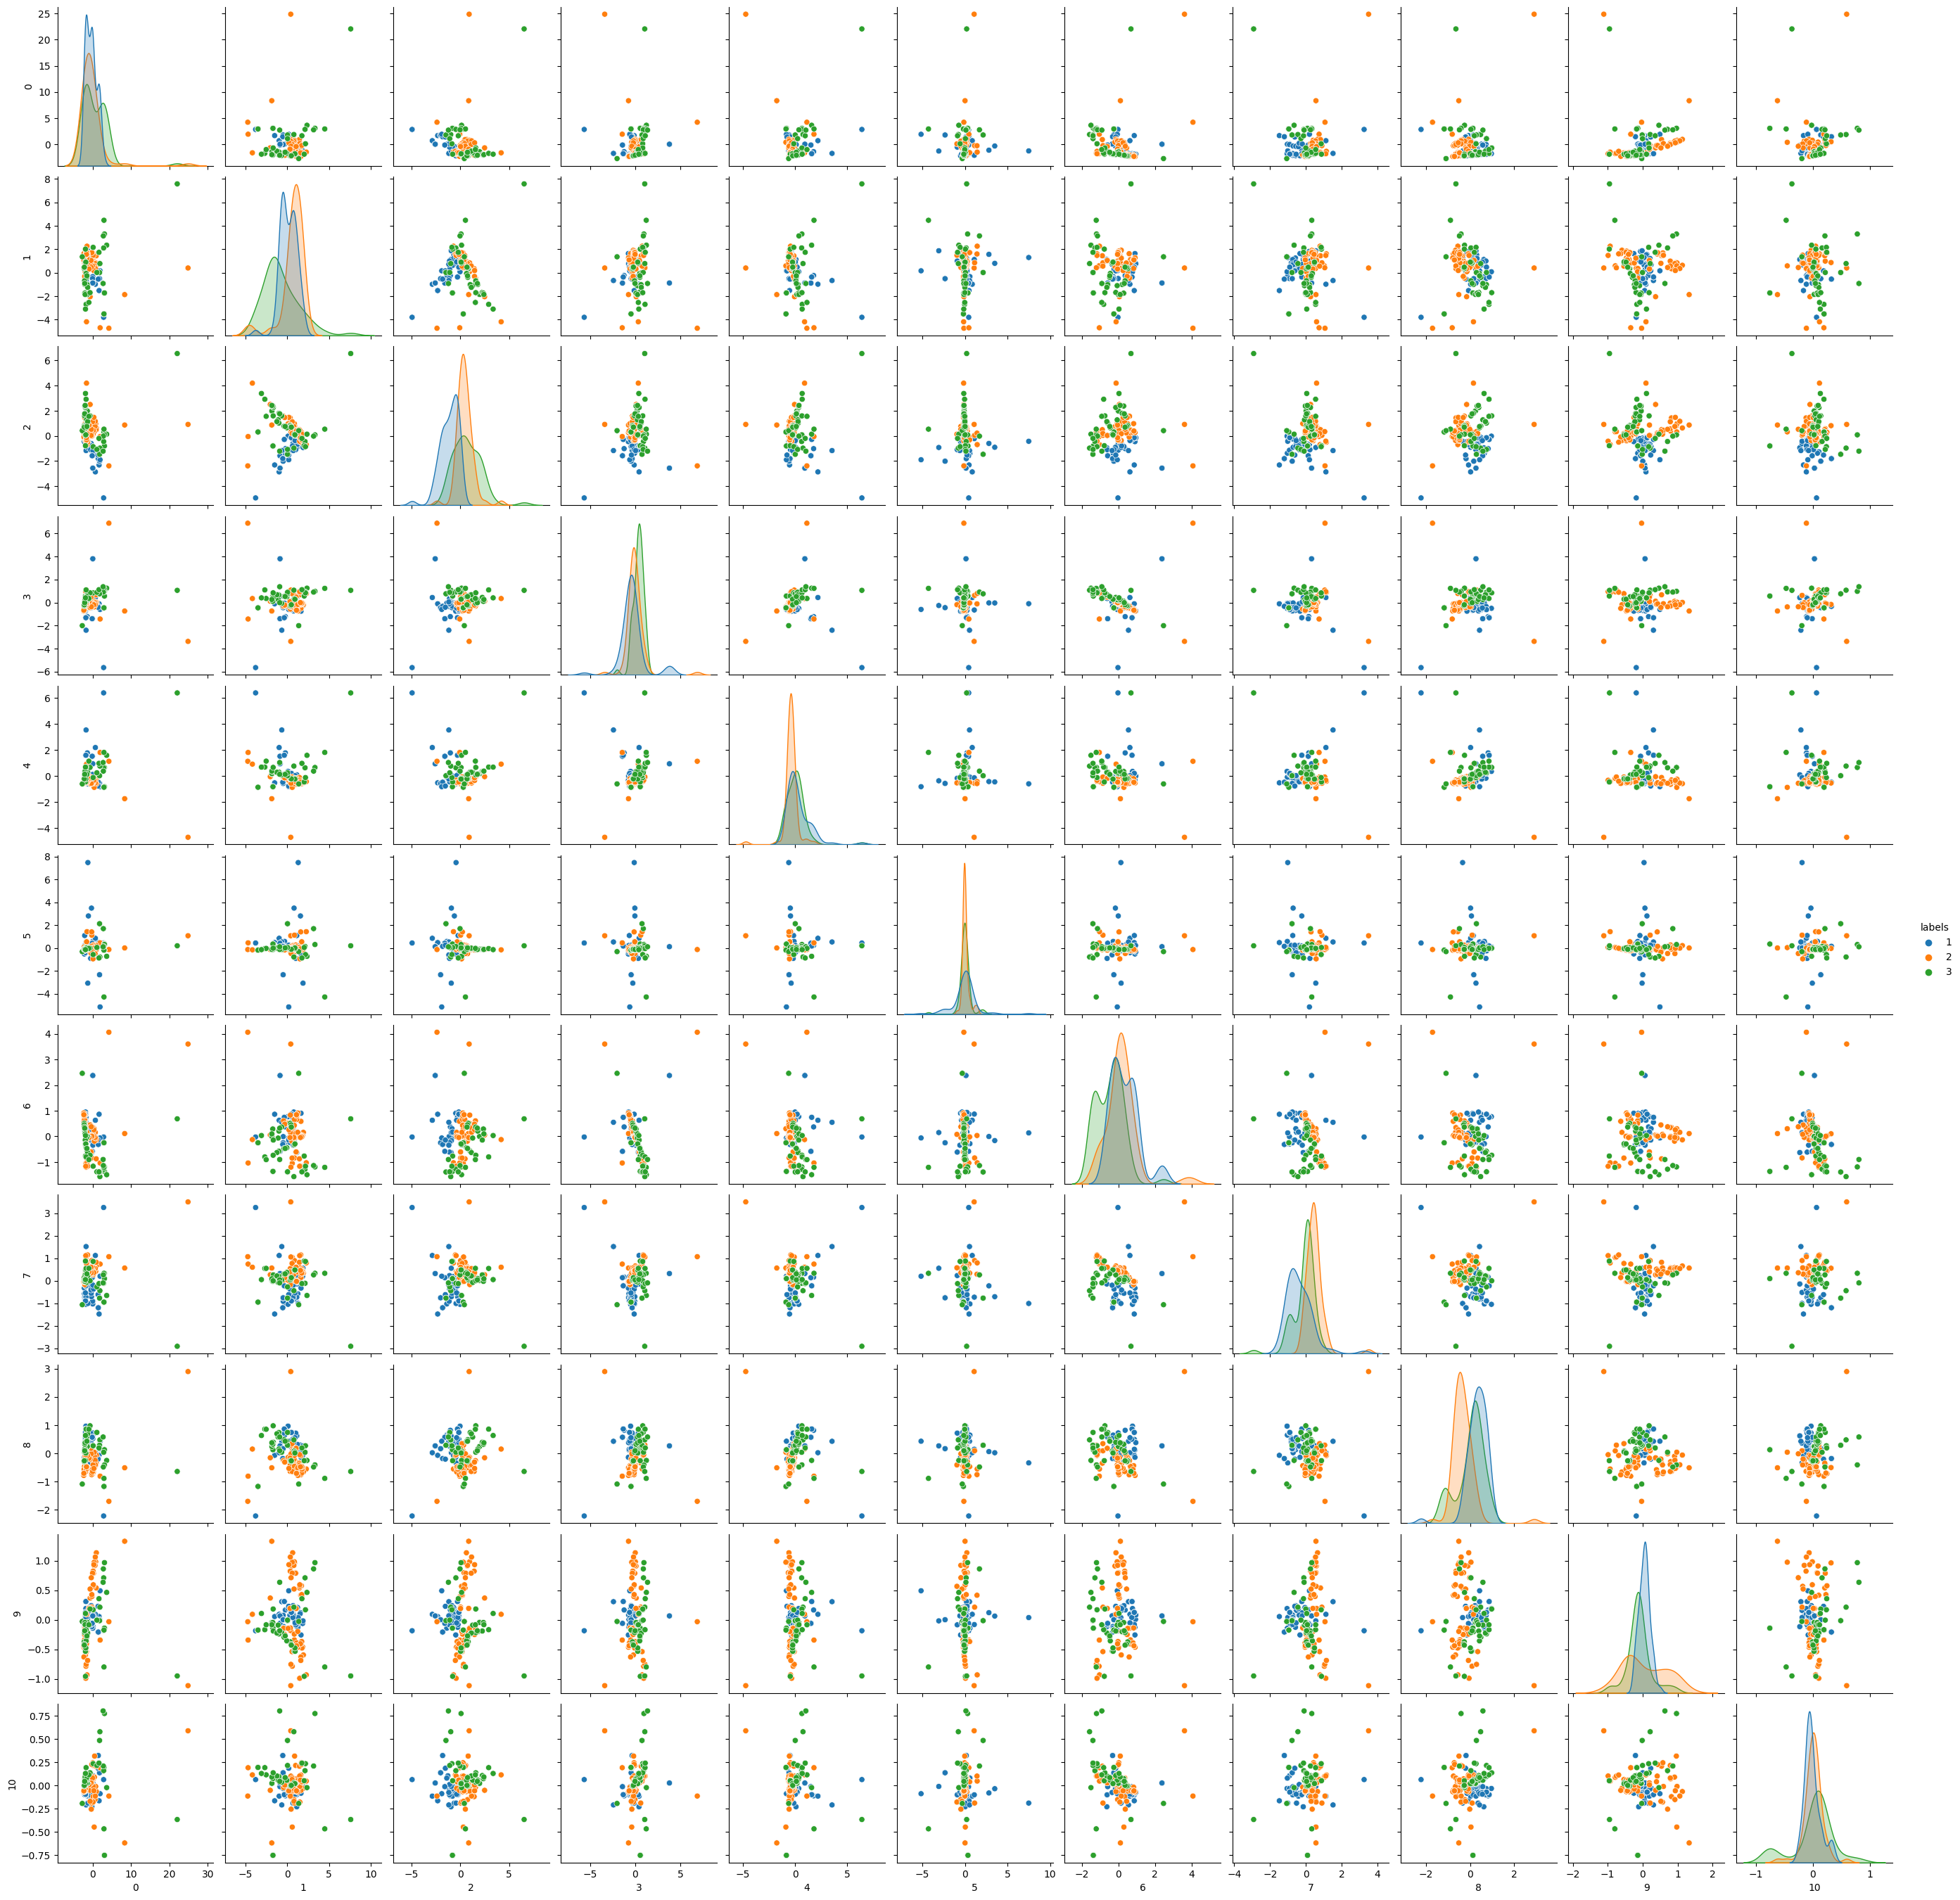

In [63]:
import seaborn as sns
dataFramePCA= pd.DataFrame(XPCA11components)
dataFramePCA['labels'] = Y
sns.pairplot(dataFramePCA, hue='labels', palette= 'tab10')

A pesar de haber realizado PCA, se nota que en el espacio latente para las diferentes componentes de PCA, las características continúan solapadas, esto denota que aún existe una alta complejidad no lineal en las características del conjunto de datos.

En casi todas las características, se muestra que todas las gaussianas de la gráfica de distribución presente en la diagonal principal están centradas en cero, por lo que es consecuente no ver mucha separabilidad entre los grupos de datos. Sin embargo, en las características obtenidas para los valores de q = 7 y 8, en el caso del color azul y naranja correspondiente al tipo de sismo 3 (Telesismo) y 2 (sismo Regional) respectivamente, se obesrva mayor separabilidad entre estos, mientras que el sismo tipo 1 (color verde) si se solapa con todos, como se muestra en la figura:

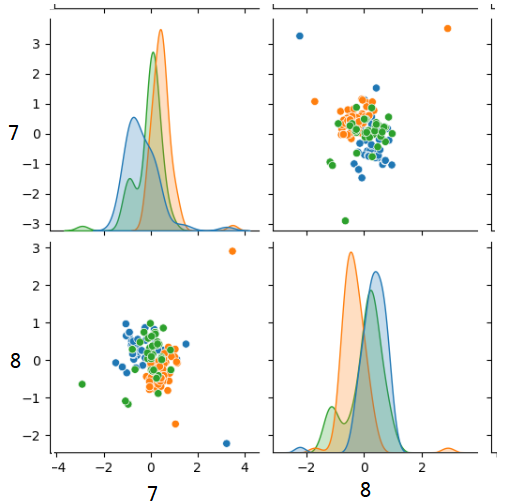


Como se dijo anteriormente, en la figura se observa que en las características de las componetes 7 y 8 muestran una mayor capacidad discriminativa entre los diferentes tipos de sismo, lo que sugiere que estas características pueden ser importantes para la clasificación de los datos.

Por otro lado, la diferencia en las amplitudes de las gaussianas en la diagonal principal de los pares de características también es una característica importante. Como, por ejemplo, en la caracteristica 9. Esto indica que hay una diferencia significativa en la distribución de los valores de esa característica entre los diferentes tipos de sismos. Si la amplitud de la gaussiana es mucho mayor para un tipo de sismo en particular en comparación con los otros tipos, entonces se puede concluir que esa característica es un buen indicador para diferenciar ese tipo de sismo de los demás. Por lo tanto, la amplitud de las gaussianas puede ser una medida importante de separabilidad entre los grupos de datos y se puede utilizar para evaluar la eficacia del modelo de clasificación en términos de separación de clases.

## Entrenamiento de modelos lineales de Regresión Logística y clasificación Bayesiana.

In [64]:
def Logistic_Regression(X, Y):
  # Dividimos el conjunto de datos en Entrenamiento y Test
  X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3,random_state = 3)

  # Creamos un modelo de Regresión Logística para Clasificación y entrenamos los datos
  logreg = LogisticRegression(C=1e5)
  logreg.fit(X_train, y_train)

  # Luego evaluamos el desempeño del clasificador tanto en entrenamiento cómo en test
  Acc_train = accuracy_score(y_train, logreg.predict(X_train))
  cMat_train = confusion_matrix(y_train, logreg.predict(X_train))

  Acc_test = accuracy_score(y_test, logreg.predict(X_test))
  cMat_test = confusion_matrix(y_test, logreg.predict(X_test))

  print('Accuracy Train: ',Acc_train)
  print('Accuracy Test: ',Acc_test)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

  ax1 = ConfusionMatrixDisplay(cMat_train, display_labels=['telesismo','local','regional']).plot(ax=ax1)
  ax1.ax_.set_title('Matriz Confusión LR Train')

  ax2 = ConfusionMatrixDisplay(cMat_test, display_labels=['telesismo','local','regional']).plot(ax=ax2)
  ax2.ax_.set_title('Matriz Confusión LR Test')
  plt.show()
  return None

def Bayessian_Clasication(X, t):
  # Dividimos el conjunto de datos en Entrenamiento y Test
  X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3,random_state = 3)

  # Creamos un modelo de Clasificación Bayessiana y entrenamos los datos
  clfNB = GaussianNB()
  clfNB.fit(X_train, y_train) # para entrenar enviamos el conjunto de Entrenamient

  # Luego evaluamos el desempeño del clasificador tanto en entrenamiento cómo en test
  Acc_train = accuracy_score(y_train, clfNB.predict(X_train))
  cMat_train = confusion_matrix(y_train, clfNB.predict(X_train))

  Acc_test = accuracy_score(y_test, clfNB.predict(X_test))
  cMat_test = confusion_matrix(y_test, clfNB.predict(X_test))

  print('Accuracy Train: ',Acc_train)
  print('Accuracy Test: ',Acc_test)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

  ConfusionMatrixDisplay(cMat_train, display_labels=['telesismo', 'local', 'regional']).plot(ax=ax1)
  ax1.set_title('Matriz Confusión LR Train')
  
  ConfusionMatrixDisplay(cMat_test, display_labels=['telesismo', 'local', 'regional']).plot(ax=ax2)
  ax2.set_title('Matriz Confusión LR Test')
  fig.tight_layout()
  plt.show()
  return None

## Evaluacion del Desempeño

1. Accuracy score
2. Confussion Matrix

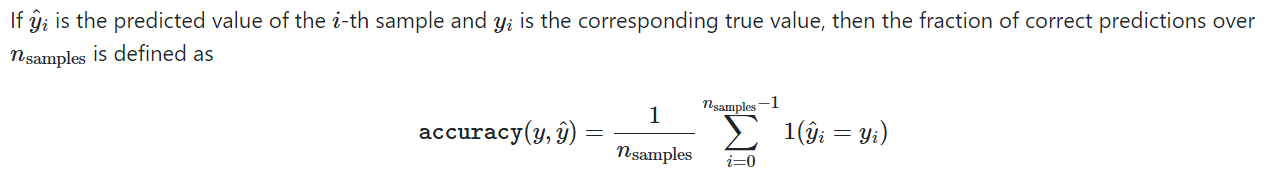

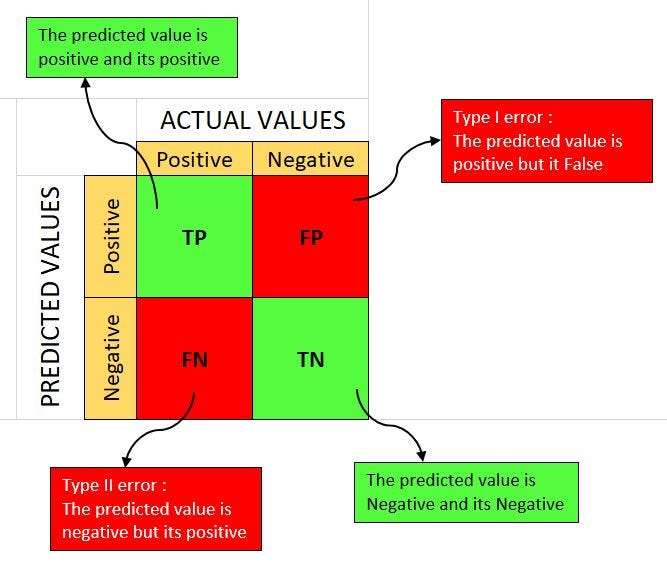

## Regresión Logística

### Desempeño sin PCA y datos sin escalar

Accuracy Train:  0.8484848484848485
Accuracy Test:  0.8245614035087719


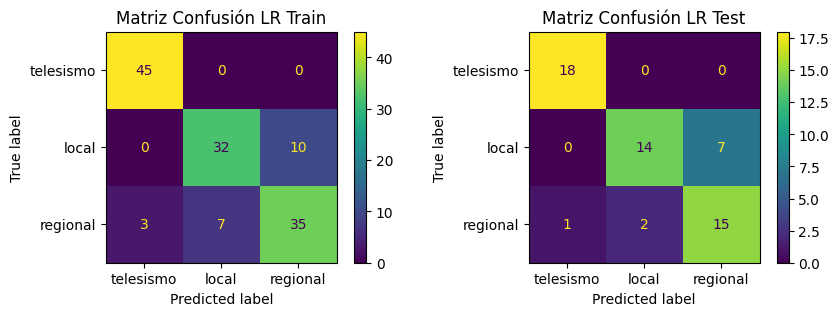

In [65]:
Logistic_Regression(X, Y)

### Desempeño sin PCA y datos sin escalados

Accuracy Train:  0.9924242424242424
Accuracy Test:  0.8947368421052632


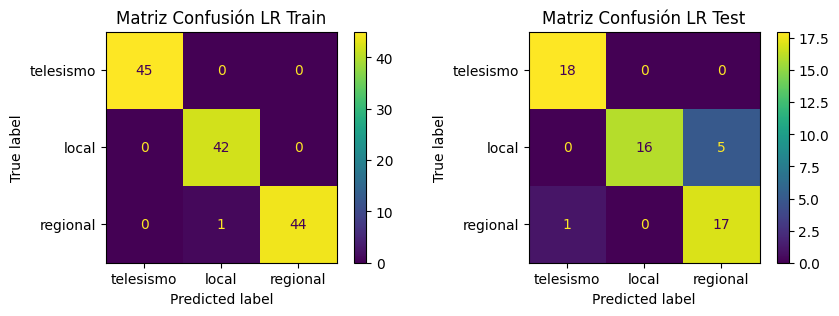

In [66]:
Logistic_Regression(Xscaled, Y)

### Desempeño con PCA (2 componentes)

Accuracy Train:  0.5378787878787878
Accuracy Test:  0.5263157894736842


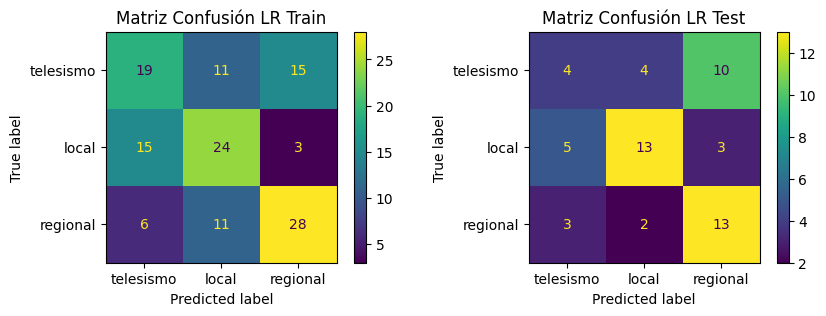

In [67]:
Logistic_Regression(XPCA2components, Y)

### Desempeño con PCA (6 componentes)

Accuracy Train:  0.9393939393939394
Accuracy Test:  0.8245614035087719


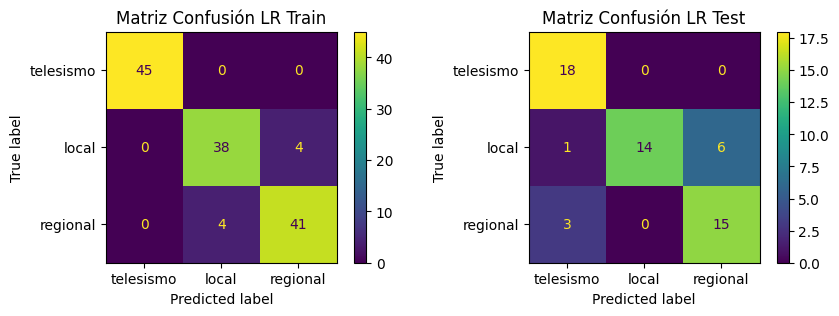

In [68]:
Logistic_Regression(XPCA6components, Y)

### Desempeño con PCA (11 componentes)

Accuracy Train:  0.9924242424242424
Accuracy Test:  0.9298245614035088


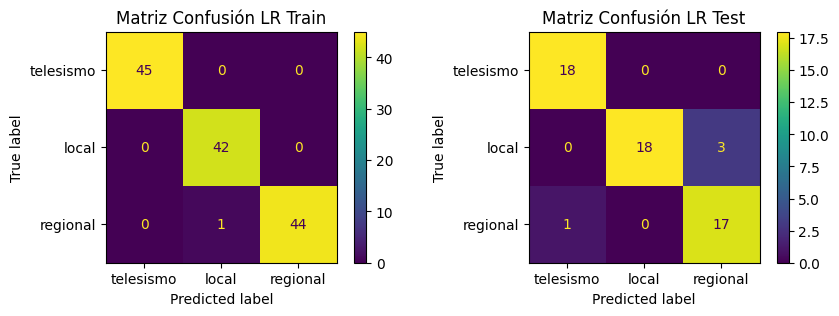

In [69]:
Logistic_Regression(XPCA11components, Y)

### Desempeño con PCA (15 componentes)

Accuracy Train:  0.9848484848484849
Accuracy Test:  0.8947368421052632


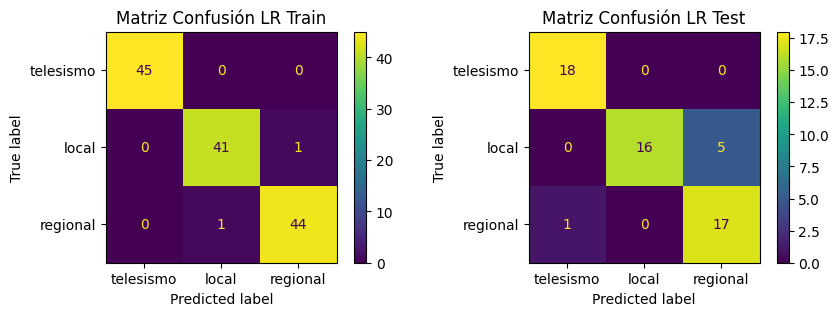

In [70]:
Logistic_Regression(XPCA15components, Y)

## Clasificación Bayesiano

### Desempeño sin PCA y datos sin escalar

Accuracy Train:  0.7878787878787878
Accuracy Test:  0.8245614035087719


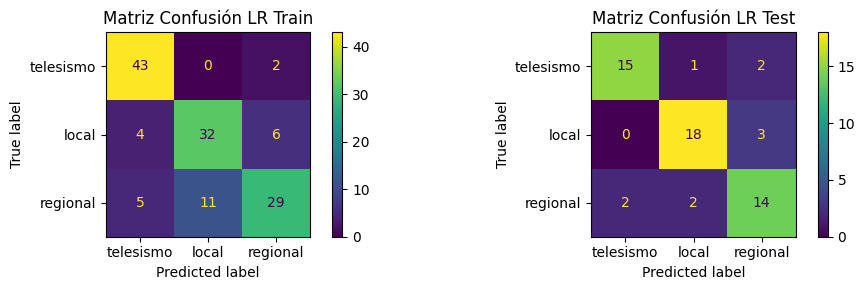

In [71]:
Bayessian_Clasication(X,Y)

### Desempeño sin PCA y datos escalados

Accuracy Train:  0.7878787878787878
Accuracy Test:  0.7894736842105263


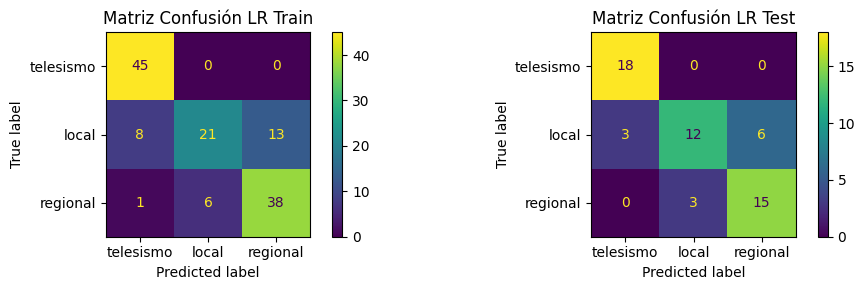

In [72]:
Bayessian_Clasication(Xscaled,Y)

### Desempeño con PCA (2 componentes)

Accuracy Train:  0.5303030303030303
Accuracy Test:  0.49122807017543857


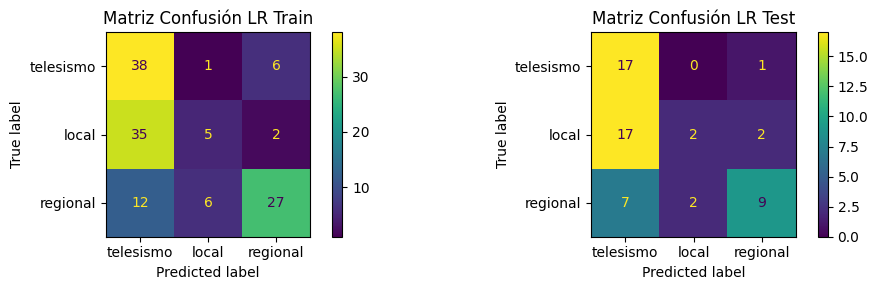

In [73]:
Bayessian_Clasication(XPCA2components,Y)

### Desempeño con PCA (6 componentes)

Accuracy Train:  0.7424242424242424
Accuracy Test:  0.8070175438596491


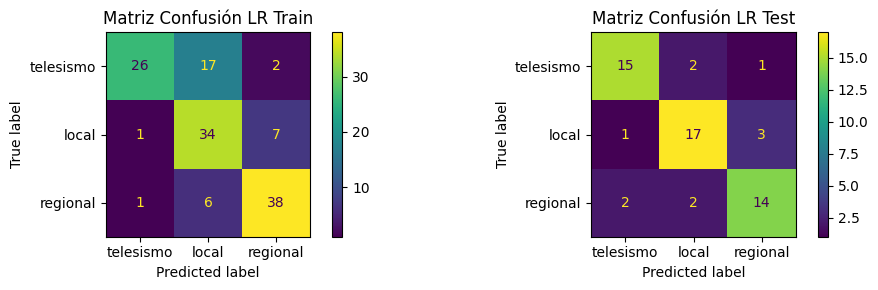

In [74]:
Bayessian_Clasication(XPCA6components,Y)

### Desempeño con PCA (11 componentes)

Accuracy Train:  0.8863636363636364
Accuracy Test:  0.8596491228070176


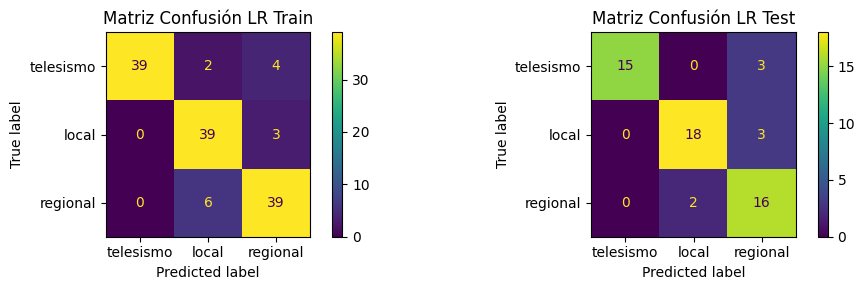

In [75]:
Bayessian_Clasication(XPCA11components,Y)

### Desempeño con PCA (15 componentes)

Accuracy Train:  0.9090909090909091
Accuracy Test:  0.8596491228070176


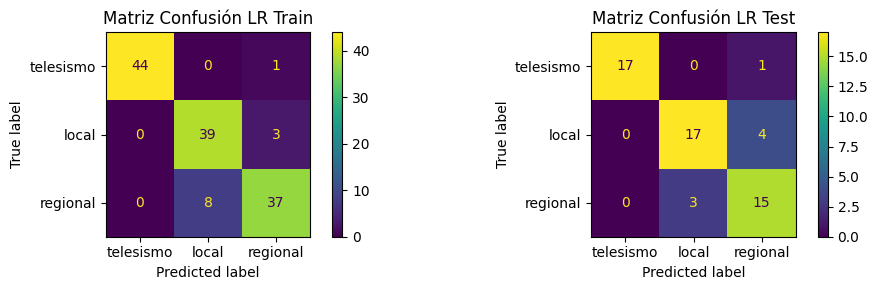

In [76]:
Bayessian_Clasication(XPCA15components,Y)

## Tabla de desempeño
Se presenta una tabla con los desempeños obtenidos por los dos modelos de clasificación (Bayesiana y R. Logistica) para los datos de entrenamiento y datos de pruebas con diferentes componentes de PCA. La tabla contiene los valores de exactitud (accuracy) para cada modelo y conjunto de datos.

In [77]:
from tabulate import tabulate

# Definimos los datos
model_names = [ 'R. Logística', 'C. Bayesiano']
exactitud = [
    [0.99243, 0.53788,  0.93939, 0.99243,  0.98485,  0.89474, 0.52631, 0.82456, 0.92983,0.89474],
    [0.78787, 0.53030,0.74242,0.88636,0.90909, 0.78948,0.49123, 0.80702, 0.85965,0.85965]
]

# Creamos una lista de listas con los datos
data = []
headers = ['Modelo', 'X_train', 'X_train', 'X_train', 'X_train', 'X_test','X_test', 'X_test', 'X_test' , 'X_test', 'X_test']
data.append(headers)
data.append(['','Scaled (Sin_PCA)', 'PCA=2', 'PCA=6', 'PCA=11','PCA=15', 'Scaled (Sin_PCA)', 'PCA=2', 'PCA=6', 'PCA=11', 'PCA=15'])

for i in range(len(model_names)):
    row = [model_names[i]]
    row += exactitud[i]
    data.append(row)

# Creamos la tabla con los datos
table = tabulate(data, tablefmt='fancy_grid')

# Mostramos la tabla
print(table)

╒══════════════╤══════════════════╤═════════╤═════════╤═════════╤═════════╤══════════════════╤═════════╤═════════╤═════════╤═════════╕
│ Modelo       │ X_train          │ X_train │ X_train │ X_train │ X_test  │ X_test           │ X_test  │ X_test  │ X_test  │ X_test  │
├──────────────┼──────────────────┼─────────┼─────────┼─────────┼─────────┼──────────────────┼─────────┼─────────┼─────────┼─────────┤
│              │ Scaled (Sin_PCA) │ PCA=2   │ PCA=6   │ PCA=11  │ PCA=15  │ Scaled (Sin_PCA) │ PCA=2   │ PCA=6   │ PCA=11  │ PCA=15  │
├──────────────┼──────────────────┼─────────┼─────────┼─────────┼─────────┼──────────────────┼─────────┼─────────┼─────────┼─────────┤
│ R. Logística │ 0.99243          │ 0.53788 │ 0.93939 │ 0.99243 │ 0.98485 │ 0.89474          │ 0.52631 │ 0.82456 │ 0.92983 │ 0.89474 │
├──────────────┼──────────────────┼─────────┼─────────┼─────────┼─────────┼──────────────────┼─────────┼─────────┼─────────┼─────────┤
│ C. Bayesiano │ 0.78787          │ 0.5303  │ 0.74242 │

## Observaciones:
- Se observa que los modelos con PCA logran un mejor desempeño que los modelos sin PCA en términos de costo computacional y en el conjunto de prueba, en el conjunto de entrenamiento se logró tener un desempeño igual pero no mayor. Por ejemplo, en la clasificación logística con PCA=11, se obtiene una matriz de confusión que muestra una mayor cantidad de verdaderos positivos y verdaderos negativos en el conjunto de prueba en comparación con la clasificación logística sin PCA y un igual desempeño en el conjunto de entrenamiento. En el caso de la clasificación Bayesiana sucede algo parecido con PCA=11, también se observa una mejora en la cantidad de verdaderos positivos en el conjunto de prueba en comparación con la clasificación Bayesiana sin PCA, pero con respecto al conjunto de entrenamiento se obtiene un peor desempeño, aproximadamente un 15% por debajo del desempeño obtenido sin PCA.

- Además, es importante resaltar que el escalado de los datos permitió obtener un mejor desempeño considerable en el modelo de Regresión Logística aplicado a los datos originales sin PCA, tanto en el conjunto de entrenamiento como en el conjunto de prueba. En cuanto al modelo de clasificación Bayesiana, sí se tuvo un peor rendimiento en el conjunto de pruebas y el mismo rendimiento en el conjunto de entrenamiento.

- También, se observa que la exactitud de ambos modelos aumenta con el número de componentes de PCA utilizadas en el entrenamiento, tanto para los datos de entrenamiento como para los de prueba. Esto indica que la inclusión de características adicionales (a través de PCA) mejora el desempeño de los modelos.


- Sin embargo, también se observa que hay un punto óptimo en términos de número de componentes, después del cual el desempeño no mejora significativamente. En este caso, parece ser que el punto óptimo es alrededor de 11 componentes para ambos modelos.

- En cuanto a la comparación entre los dos modelos, se puede observar que la Regresión Logística tiene un mejor desempeño que el Clasificador Bayesiano para la mayoría de los casos, tanto en los datos de entrenamiento como en los de prueba. Esto indica que la Regresión Logística es un modelo más adecuado para este problema de clasificación.

- Se observa que hay una diferencia significativa entre los valores de exactitud en los datos de entrenamiento y los datos de prueba para algunos casos (por ejemplo, para 2 componentes de PCA en la Regresión Logística). Esto sugiere que en esos casos, el modelo está sobreajustando a los datos de entrenamiento y no generalizando bien a nuevos datos.

- Por el contrario, En el modelo de clasificación Bayesiana para PCA=6 y Sin_PCA, la exactitud en el en los datos de prueba fue del 80.7% y 79%, mientras que en los datos de entrenamiento fue del 74.2% y 78.7% respectivamente. Esto quiere decir que el modelo de clasificación Bayesiano está generalizando bien y no se está sobreajustando a los datos de entrenamiento. 

- Finalmente, se puede observar que, en general, la inclusión de PCA no parece tener un gran impacto en la exactitud de los modelos en los datos de prueba con respecto a los de entrenamiento (excepto para 2 componentes en clasificación Bayesiana). Sin embargo, aún así, se obtiene un mejor desempeño en los datos de prueba con PCA en comparación con los datos de prueba sin PCA.

## **Reconocimiento de rostros usando EigenFAces**

## Cargar la base de datos Face in the Wild


Para cargar la base de datos, utilizaremos la función fetch que descarga la base de datos para su procesamiento:

Etiquetas existentes en la base de datos: ['Alejandro Toledo' 'Alvaro Uribe' 'Andre Agassi' 'Ariel Sharon'
 'Arnold Schwarzenegger' 'Colin Powell' 'David Beckham' 'Donald Rumsfeld'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Guillermo Coria' 'Hans Blix' 'Hugo Chavez' 'Jacques Chirac'
 'Jean Chretien' 'Jennifer Capriati' 'John Ashcroft' 'John Negroponte'
 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Silva' 'Megawati Sukarnoputri' 'Nestor Kirchner'
 'Recep Tayyip Erdogan' 'Roh Moo-hyun' 'Serena Williams'
 'Silvio Berlusconi' 'Tom Ridge' 'Tony Blair' 'Vicente Fox'
 'Vladimir Putin']

(2370, 50, 37)
(2370, 1850)


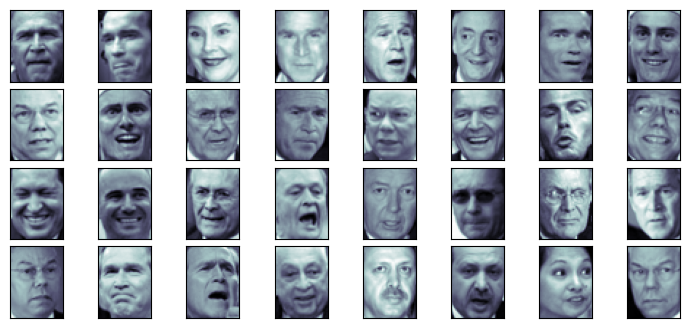

In [78]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30, resize=0.4)

print("Etiquetas existentes en la base de datos: {}\n".format(faces.target_names))

data = faces.data
labels = faces.target
print(faces.images.shape)
print(faces.data.shape)

fig, axes = plt.subplots(4, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.data[0+i].reshape(50, 37), cmap='bone')

# Implementación de PCA

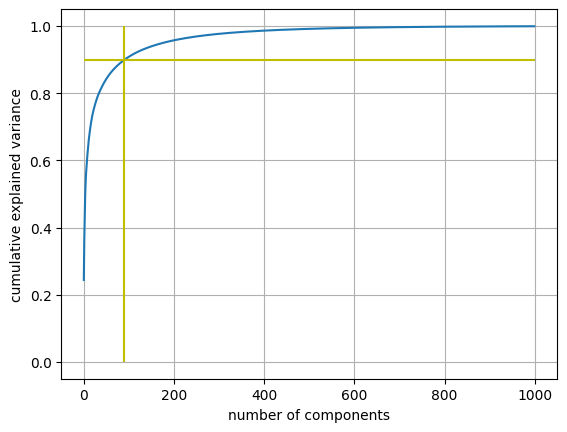

In [79]:
pca = PCA(n_components = 1000, svd_solver='randomized')
pca.fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(90,0.,1.,colors='y')
plt.hlines(0.9,0.,1000.,colors='y')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

Basandose en la anterior gráfica se decide trabajar con los siguientes valores para PCA:

* 8 Componentes que corresponden a 0.6 de la varianza acumulada
* 35 Componentes que corresponden a 0.8 de la varianza acumulada
* 90 Componentes que corresponden a 0.9 de la varianza acumulada
* 310 Componentes que corresponden a 0.98 de la varianza acumulada
* 750 Componentes que corresponden a 0.99 de la varianza acumulada
* 1000 Componentes que corresponden a 0.999 de la varianza acumulada

Aplicación de PCA con el número de componentes seleccionado.

In [80]:
pca_8Components = PCA(n_components=8, svd_solver='randomized').fit(data)
eigenfacesPCA8 = pca_8Components.transform(data)

pca_35Components = PCA(n_components=35, svd_solver='randomized').fit(data)
eigenfacesPCA35 = pca_35Components.transform(data)

pca_90Components = PCA(n_components=90, svd_solver='randomized').fit(data)
eigenfacesPCA90 = pca_90Components.transform(data)

pca_310Components = PCA(n_components=310, svd_solver='randomized').fit(data)
eigenfacesPCA310 = pca_310Components.transform(data)

pca_750Components = PCA(n_components=750, svd_solver='randomized').fit(data)
eigenfacesPCA750 = pca_750Components.transform(data)

pca_1000Components = PCA(n_components=1000, svd_solver='randomized').fit(data)
eigenfacesPCA1000 = pca_1000Components.transform(data)

# Vizualización de los rostros en el espacio latente con diferentes componentes.

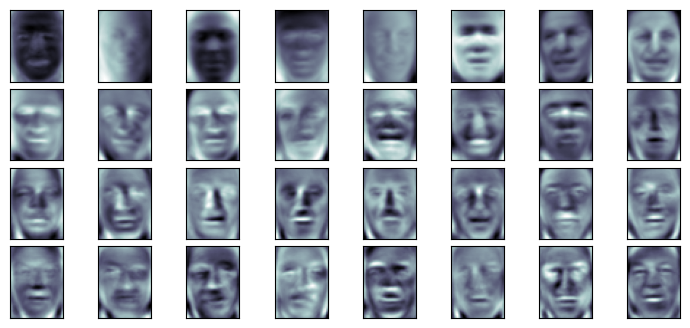

In [81]:
fig, axes = plt.subplots(4, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca_35Components.components_[0+i].reshape(50, 37), cmap='bone')

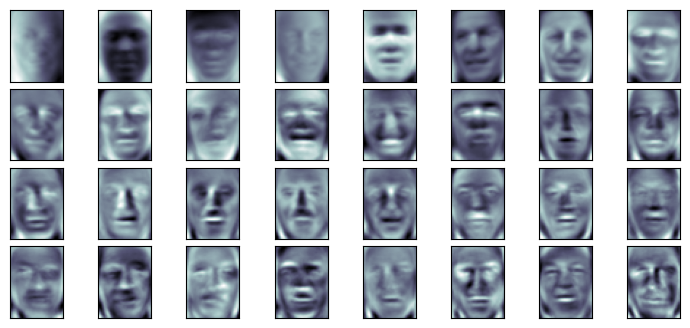

In [82]:
fig, axes = plt.subplots(4, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca_90Components.components_[1+i].reshape(50, 37), cmap='bone')

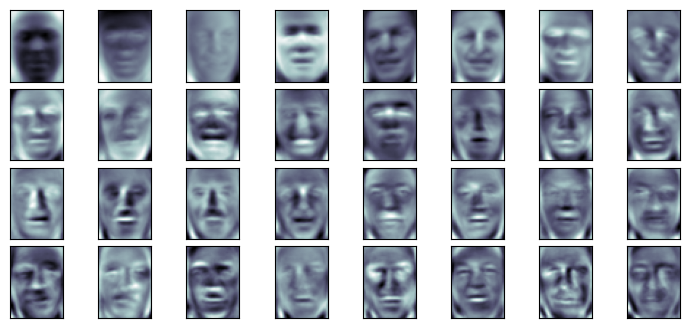

In [83]:
fig, axes = plt.subplots(4, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca_310Components.components_[2+i].reshape(50, 37), cmap='bone')


Al proyectar los rostros en ambos espacios latentes, se puede observar que en el espacio de menor dimensionalidad, los rostros tienen una apariencia más difusa y menos detallada que en el espacio de alta dimensionalidad. Esto se debe a que al reducir la dimensionalidad, se pierde información. Sin embargo, la visualización de los rostros proyectados en el espacio de menor dimensionalidad puede ser útil para identificar patrones y tendencias generales en los datos, lo que puede ayudar a mejorar el rendimiento del modelo de clasificación. Además, al comparar las imágenes de los rostros proyectados en ambos espacios latentes, se pueden observar diferencias en las características de los rostros. En el espacio de alta dimensionalidad original, las imágenes de los rostros son mucho más detalladas, mientras que en el espacio de menor dimensionalidad generado por PCA, los rostros se ven más suavizados y se pueden identificar características generales en común entre los diferentes rostros. Esto se debe a que PCA reduce la complejidad del conjunto de datos original al eliminar la información redundante y enfocarse en las características más importantes.

#Aplicación del modelo Regresión Logística.


In [84]:
from tabulate import tabulate

def Logistic_RegressionFace(X, Y):
    #Parametro de regularización de los coeficientes del modelo
    C = [1e-5,1e-3, 1e-1, 1, 1e1, 1e2,1e5] 
    table = []
    for c in C:
        # Dividimos el conjunto de datos en Entrenamiento y Test
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

        # Creamos un modelo de Regresión Logística para Clasificación y entrenamos los datos
        logreg = LogisticRegression(C=c)
        logreg.fit(X_train, y_train)

        # Luego evaluamos el desempeño del clasificador tanto en entrenamiento cómo en test
        Acc_train = accuracy_score(y_train, logreg.predict(X_train))
        Acc_test = accuracy_score(y_test, logreg.predict(X_test))

        table.append([c, Acc_train, Acc_test])

    headers = ["C (Regularización)", "Accuracy X_Train", "Accuracy X_Test"]
    col_aligns = ["center"] * len(headers)
    table_str = tabulate(table, headers=headers, floatfmt=".3f", tablefmt="grid", colalign=col_aligns)

    print(table_str)
    return None

### Desempeño sin PCA

In [85]:
Logistic_RegressionFace(data, labels)

+----------------------+--------------------+-------------------+
|  C (Regularización)  |  Accuracy X_Train  |  Accuracy X_Test  |
+======================+====================+===================+
|        0.000         |       0.223        |       0.225       |
+----------------------+--------------------+-------------------+
|        0.001         |       0.242        |       0.235       |
+----------------------+--------------------+-------------------+
|        0.100         |       0.820        |       0.585       |
+----------------------+--------------------+-------------------+
|        1.000         |       0.957        |       0.674       |
+----------------------+--------------------+-------------------+
|        10.000        |       0.970        |       0.648       |
+----------------------+--------------------+-------------------+
|       100.000        |       0.961        |       0.650       |
+----------------------+--------------------+-------------------+
|      100

### Desempeño con PCA (8 componentes)

In [86]:
Logistic_RegressionFace(eigenfacesPCA8, labels)

+----------------------+--------------------+-------------------+
|  C (Regularización)  |  Accuracy X_Train  |  Accuracy X_Test  |
+======================+====================+===================+
|        0.000         |       0.223        |       0.225       |
+----------------------+--------------------+-------------------+
|        0.001         |       0.232        |       0.229       |
+----------------------+--------------------+-------------------+
|        0.100         |       0.340        |       0.301       |
+----------------------+--------------------+-------------------+
|        1.000         |       0.355        |       0.308       |
+----------------------+--------------------+-------------------+
|        10.000        |       0.351        |       0.309       |
+----------------------+--------------------+-------------------+
|       100.000        |       0.350        |       0.308       |
+----------------------+--------------------+-------------------+
|      100

### Desempeño con PCA (35 componentes)

In [87]:
Logistic_RegressionFace(eigenfacesPCA35, labels)

+----------------------+--------------------+-------------------+
|  C (Regularización)  |  Accuracy X_Train  |  Accuracy X_Test  |
+======================+====================+===================+
|        0.000         |       0.223        |       0.225       |
+----------------------+--------------------+-------------------+
|        0.001         |       0.237        |       0.235       |
+----------------------+--------------------+-------------------+
|        0.100         |       0.630        |       0.508       |
+----------------------+--------------------+-------------------+
|        1.000         |       0.734        |       0.568       |
+----------------------+--------------------+-------------------+
|        10.000        |       0.758        |       0.553       |
+----------------------+--------------------+-------------------+
|       100.000        |       0.763        |       0.537       |
+----------------------+--------------------+-------------------+
|      100

### Desempeño con PCA (90 componentes)

In [88]:
Logistic_RegressionFace(eigenfacesPCA90, labels)

+----------------------+--------------------+-------------------+
|  C (Regularización)  |  Accuracy X_Train  |  Accuracy X_Test  |
+======================+====================+===================+
|        0.000         |       0.223        |       0.225       |
+----------------------+--------------------+-------------------+
|        0.001         |       0.238        |       0.235       |
+----------------------+--------------------+-------------------+
|        0.100         |       0.760        |       0.594       |
+----------------------+--------------------+-------------------+
|        1.000         |       0.928        |       0.657       |
+----------------------+--------------------+-------------------+
|        10.000        |       0.983        |       0.639       |
+----------------------+--------------------+-------------------+
|       100.000        |       0.999        |       0.622       |
+----------------------+--------------------+-------------------+
|      100

### Desempeño con PCA (310 componentes)

In [89]:
Logistic_RegressionFace(eigenfacesPCA310, labels)

+----------------------+--------------------+-------------------+
|  C (Regularización)  |  Accuracy X_Train  |  Accuracy X_Test  |
+======================+====================+===================+
|        0.000         |       0.223        |       0.225       |
+----------------------+--------------------+-------------------+
|        0.001         |       0.238        |       0.235       |
+----------------------+--------------------+-------------------+
|        0.100         |       0.826        |       0.608       |
+----------------------+--------------------+-------------------+
|        1.000         |       0.992        |       0.677       |
+----------------------+--------------------+-------------------+
|        10.000        |       1.000        |       0.671       |
+----------------------+--------------------+-------------------+
|       100.000        |       1.000        |       0.660       |
+----------------------+--------------------+-------------------+
|      100

### Desempeño con PCA (750 componentes)

In [90]:
Logistic_RegressionFace(eigenfacesPCA750, labels)

+----------------------+--------------------+-------------------+
|  C (Regularización)  |  Accuracy X_Train  |  Accuracy X_Test  |
+======================+====================+===================+
|        0.000         |       0.223        |       0.225       |
+----------------------+--------------------+-------------------+
|        0.001         |       0.238        |       0.235       |
+----------------------+--------------------+-------------------+
|        0.100         |       0.834        |       0.610       |
+----------------------+--------------------+-------------------+
|        1.000         |       0.995        |       0.674       |
+----------------------+--------------------+-------------------+
|        10.000        |       1.000        |       0.674       |
+----------------------+--------------------+-------------------+
|       100.000        |       1.000        |       0.672       |
+----------------------+--------------------+-------------------+
|      100

### Desempeño con PCA (1000 componentes)

In [91]:
Logistic_RegressionFace(eigenfacesPCA1000, labels)

+----------------------+--------------------+-------------------+
|  C (Regularización)  |  Accuracy X_Train  |  Accuracy X_Test  |
+======================+====================+===================+
|        0.000         |       0.223        |       0.225       |
+----------------------+--------------------+-------------------+
|        0.001         |       0.238        |       0.235       |
+----------------------+--------------------+-------------------+
|        0.100         |       0.838        |       0.610       |
+----------------------+--------------------+-------------------+
|        1.000         |       0.996        |       0.672       |
+----------------------+--------------------+-------------------+
|        10.000        |       1.000        |       0.674       |
+----------------------+--------------------+-------------------+
|       100.000        |       1.000        |       0.672       |
+----------------------+--------------------+-------------------+
|      100

## Observaciones
- Para EigenFAces, se observa en las tablas que desempeño del modelo mejora significativamente cuando se utilizan más componentes de PCA. En particular, el modelo con 310 componentes de PCA tiene un desempeño significativamente mejor que el modelo sin PCA o con menos componentes de PCA  e incluso hasta con más componentes de PCA. Además, se tienen mejores resultados y con un menor costo computacional, ya que se reduce significativamente la complejidad del modelo y el tiempo de entrenamiento, con una dimensionalidad mucho más pequeña y eficiente que la original.

- También se observa, que el desempeño del modelo mejora de manera significativa con un aumento en el valor de C (regularización). Sin embargo, el efecto de la regularización en el desempeño se vuelve menos pronunciado a medida que se agregan más componentes de PCA. El mejor desempeño en el conjunto de prueba se obtiene con C = 10 en el caso de  PCA con 310 componentes. Para este valor de C, se alcanzan los mejores resultados en términos de exactitud en el conjunto de prueba. Para valores de C y de PCA superiores, no se observa una mejora significativa en el desempeño y, en algunos casos, se observa una ligera disminución especialmente en los datos de prueba.

- Por lo tanto, el desempeño del modelo de R. logistica en el conjunto de entrenamiento es mucho mejor que en el conjunto de prueba, por ende el modelo parece estar aprendiendo demasiado de los datos de entrenamiento y no generalizando lo suficiente para los datos nuevos y desconocidos en el conjunto de prueba. Esto indica que el modelo está sobre-ajustando el conjunto de entrenamiento. En resumen, una baja regularización y un número más alto de componentes no siempre se traduce en un mejor desempeño en el conjunto de prueba.

## Conclusiones

- Al aplicar PCA a las características con el fin de reducir la dimensionalidad y llevarlas al espacio latente, no se pudo lograr una mejor visualización de ellas, dado que igualmente se veían traslapadas entre sí. Por lo tanto, aunque se logró reducir la dimensionalidad, esto no resultó en una mejor visualización de las características y se requieren de enfoques alternativos para la clasificación.

- En general, se observó que los resultados de desempeño fueron superiores al utilizar PCA para reducir la dimensionalidad de los datos en comparación con el uso de todas las características originales. Esto indica que la reducción de dimensionalidad mediante PCA mejoró el desempeño de los modelos al permitir un análisis más eficiente de los datos. Al seleccionar solo las características más representativas y descartar aquellas que no aportan tanta información al análisis, se puede reducir la complejidad computacional de los modelos. Por lo tanto, la reducción de dimensionalidad a través de PCA puede ayudar a obtener mejores resultados de desempeño y una mayor eficiencia computacional en el análisis de datos.

- El modelo de regresión logística muestra un desempeño satisfactorio en el conjunto de datos de entrenamiento, tanto en el espacio de entrada como en el espacio latente, y obtiene un mejor desempeño en comparación con el clasificador bayesiano. Sin embargo, al evaluar el modelo en el conjunto de prueba, se observa que el desempeño no mejora y el modelo tiende a sobre-ajustarse a los datos de entrenamiento, lo que resulta en una mala generalización a nuevos datos. Por otro lado, el modelo de clasificación bayesiana presenta un mejor desempeño en el conjunto de prueba en comparación con el conjunto de entrenamiento, lo que indica que generaliza bien y no se sobre-ajusta a los datos de entrenamiento.

- Además, se puede concluir que el parámetro de regularización C tiene un impacto significativo en el desempeño del modelo de regresión logística, y se debe encontrar un equilibrio entre el desempeño en el conjunto de entrenamiento y en el conjunto de prueba. Una regularización muy fuerte tiende a dar lugar a un mejor desempeño en el conjunto de entrenamiento, pero puede provocar un sobre-ajuste en el conjunto de prueba.


- Por último, se concluye que el escalado de los datos fue beneficioso para mejorar el desempeño del modelo de Regresión Logística aplicado a los datos originales sin PCA, tanto en el conjunto de entrenamiento como en el conjunto de prueba. Sin embargo, en el caso del modelo de clasificación Bayesiana, se observó un peor rendimiento en el conjunto de pruebas y el mismo rendimiento en el conjunto de entrenamiento, lo que indica que el escalado de datos no mejoró el rendimiento de este modelo en particular.Esto sugiere que el escalado de los datos puede ser una técnica útil para mejorar el rendimiento de los modelos de aprendizaje automático. Pero se requiere una evaluación más exhaustiva del impacto del escalado de datos en el rendimiento de diferentes modelos de aprendizaje automático.